Practical Test: Training a Prediction Model Using the California Housing Dataset

Part 1: Data Loading and Exploration (20 points)

* Load the California Housing dataset using scikit-learn. (5 points)
```
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
```
* Print basic information about the dataset, including the number of features and samples. (5 points)

* Create a pandas DataFrame and perform initial exploratory data analysis, including viewing the first few rows of data and basic statistical descriptions. (10 points)

Part 2: Data Preprocessing (20 points)

* Split the dataset into training and test sets, using 80% of the data as the training set. (5 points)

* Standardize the features. (10 points)

* Check for missing values and handle them appropriately if any are found. (5 points)

Part 3: Model Training (30 points)

* Choose an appropriate regression model (such as linear regression, decision tree regression, or random forest regression). (5 points)

* Train the chosen model using the training set. (10 points)

* Evaluate the model's performance using 5-fold cross-validation. (15 points)

Part 4: Model Evaluation and Prediction (20 points)

* Evaluate the model's performance on the test set using metrics such as Mean Squared Error (MSE) and Coefficient of Determination (R²). (10 points)

* Use the trained model to make predictions on new data. Select 5 samples for prediction and explain the results. (10 points)

Part 5: Results Analysis and Improvement (10 points)

* Analyze the advantages and disadvantages of the model, and propose at least two possible directions for improvement. (10 points)

task 1, set up the environment that will help you finish the tasks.
You need to install the package you think you need to use

In [ ]:
#!pip install scikit-learn pandas numpy
# im using anaconda so i don't need to install them.

task 2, The dataset is loaded for you, you need to use scikit-learn to train a model, you need to do it step by step and explain your choice

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
x, y = housing.data, housing.target

In [8]:
import pandas as pd
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [16]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [62]:
print(f"""\
fearture count: {len(housing.feature_names)}
sample count: {housing.data.shape[0]}
feature names: {housing.feature_names}
target names: {housing.target_names}
""")

fearture count: 8
sample count: 20640
feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
target names: ['MedHouseVal']



In [12]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)


In [20]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Test Set Mean Squared Error: {mse}")

# Calculate R²
r2 = r2_score(y_test, y_pred)
print(f"Test Set R²: {r2}")


Test Set Mean Squared Error: 0.255169737347244
Test Set R²: 0.8052747336256919


In [28]:
import matplotlib.pyplot as plt
import numpy as np

def plot_actual_vs_predicted(y_test, y_pred, num_samples=50):
    """
    Plots actual vs predicted values for comparison.
    
    Parameters:
    - y_test: The actual target values
    - y_pred: The predicted values from the model
    - num_samples: Number of samples to plot (default is 50)
    """
    # Select a subset of samples for a cleaner plot
    indices = np.arange(len(y_test))[:num_samples]
    
    plt.figure(figsize=(12, 6))
    plt.plot(indices, y_test[:num_samples], label='Actual', color='b', marker='o')
    plt.plot(indices, y_pred[:num_samples], label='Predicted', color='r', marker='x')
    
    plt.title(f"Actual vs. Predicted Values (First {num_samples} samples)")
    plt.xlabel("Sample Index")
    plt.ylabel("Value")
    plt.legend()
    plt.show()


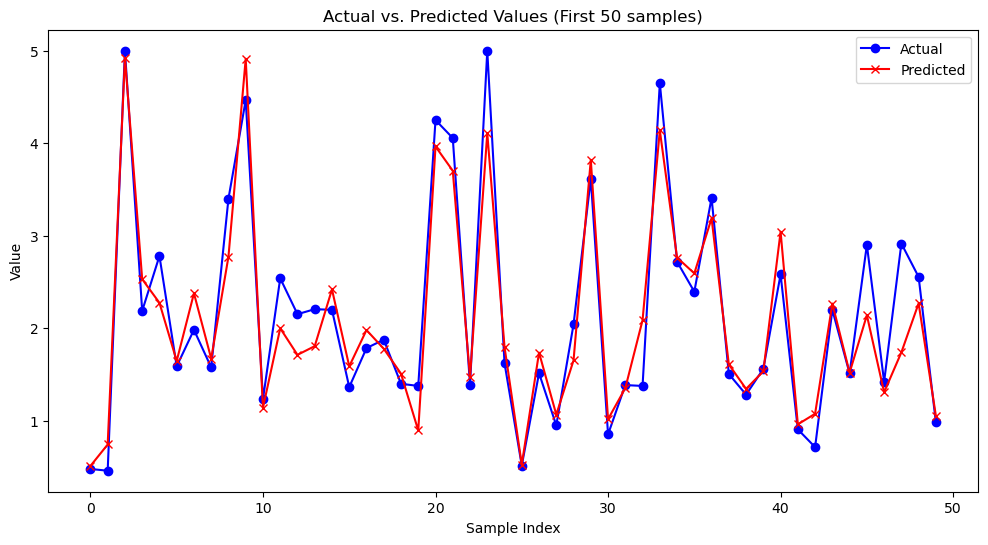

In [29]:
plot_actual_vs_predicted(y_test, y_pred, num_samples=50)

In [30]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
mse_scores = -cv_scores
print(f"Cross-validated MSE: {mse_scores}")
print(f"Average MSE: {mse_scores.mean()}")


Cross-validated MSE: [0.26133822 0.26718325 0.25820455 0.25528318 0.26585486]
Average MSE: 0.26157281288367484


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define the base model
model = RandomForestRegressor(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [39]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=20, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='neg_mean_squared_error')

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Best hyperparameters
print(f"Best Hyperparameters: {random_search.best_params_}")

# Best score
print(f"Best MSE from RandomizedSearchCV: {-random_search.best_score_}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Best MSE from RandomizedSearchCV: 0.24254228226734234


In [42]:
# Get the best estimator
best_model = random_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Set MSE: {mse}")
print(f"Test Set R²: {r2}")


Test Set MSE: 0.24031843844773165
Test Set R²: 0.8166080647811674


In [41]:
# uncomment this if you want to use GridSearch.
# Hint: it would take alot of time.

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')

# # Fit the model
# grid_search.fit(X_train_scaled, y_train)

# # Best hyperparameters
# print(f"Best Hyperparameters: {grid_search.best_params_}")

# # Best score
# print(f"Best MSE from GridSearchCV: {-grid_search.best_score_}")


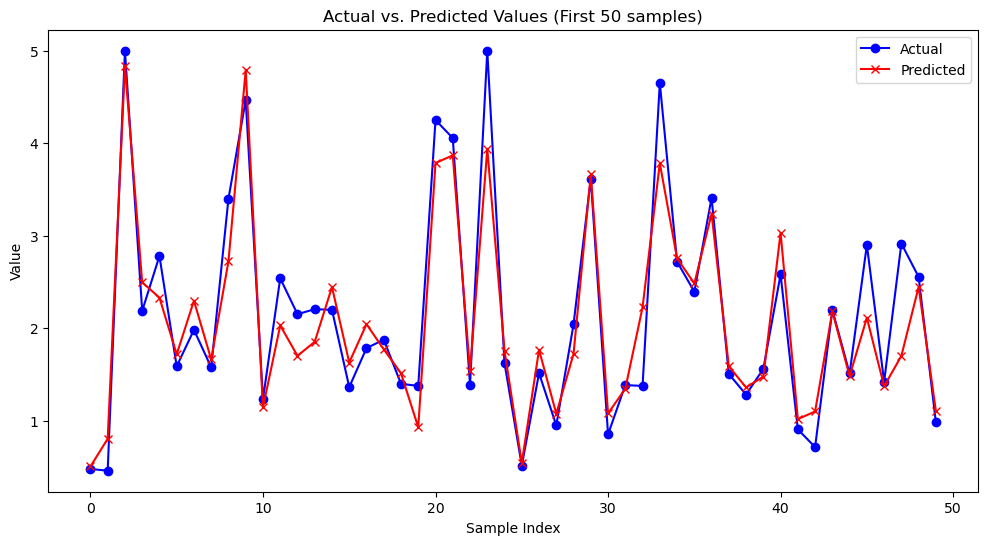

In [61]:
plot_actual_vs_predicted(y_test, y_pred, num_samples=50)

Print basic information of the data set,
1. fearture count
2. sample count
3. feature names
4. target names

fearture count: 8
sample count: 20640
feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
target names: ['MedHouseVal']
